<a href="https://colab.research.google.com/github/Sehastrajit-clg/Deep-Learning/blob/main/Faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torchvision.transforms as transform
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
object_detection_model = fasterrcnn_resnet50_fpn(pretrained = True)
object_detection_model.eval();

In [7]:
test_img=Image.open("test_img1.jpeg")

In [8]:
width,height = test_img.size
print("The dimensions of the image are {width} x {height} ") #format the variables

The dimensions of the image are {width} x {height} 


In [19]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [20]:
test_img_tensor = transform(test_img)
test_img_tensor

tensor([[[0.3451, 0.3608, 0.3647,  ..., 0.0039, 0.0039, 0.0039],
         [0.3569, 0.3725, 0.3725,  ..., 0.0039, 0.0039, 0.0039],
         [0.3529, 0.3686, 0.3725,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.2863, 0.2980, 0.3098,  ..., 0.1216, 0.1176, 0.1137],
         [0.2863, 0.2980, 0.3098,  ..., 0.1216, 0.1176, 0.1137],
         [0.2863, 0.3020, 0.3098,  ..., 0.1216, 0.1176, 0.1137]],

        [[0.3216, 0.3373, 0.3373,  ..., 0.0039, 0.0039, 0.0039],
         [0.3333, 0.3490, 0.3451,  ..., 0.0039, 0.0039, 0.0039],
         [0.3294, 0.3451, 0.3451,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.1922, 0.1961, 0.2078,  ..., 0.0980, 0.0941, 0.0902],
         [0.1922, 0.1961, 0.2078,  ..., 0.0980, 0.0941, 0.0902],
         [0.1922, 0.2000, 0.2078,  ..., 0.0980, 0.0941, 0.0902]],

        [[0.2745, 0.2902, 0.2980,  ..., 0.0039, 0.0039, 0.0039],
         [0.2863, 0.3020, 0.3059,  ..., 0.0039, 0.0039, 0.0039],
         [0.2824, 0.2980, 0.3059,  ..., 0.0039, 0.0039, 0.

In [21]:
test_img_tensor.shape

torch.Size([3, 408, 612])

In [22]:
test_img_tensor = test_img_tensor.unsqueeze(dim=0)
test_img_tensor.shape

torch.Size([1, 3, 408, 612])

In [24]:
preds=object_detection_model(test_img_tensor)
preds

[{'boxes': tensor([[233.1602,  90.1161, 431.7190, 378.3868],
          [132.6686,  28.4824, 266.2517, 372.5306],
          [132.4319,  33.1351, 265.7533, 358.0821],
          [165.9605,  50.4177, 391.7908, 377.0103],
          [ 91.6329, 339.3947, 577.6117, 404.5926],
          [110.4094,  15.6221, 365.4839, 386.3339],
          [ 75.3653,  43.4748, 465.1440, 384.1267],
          [449.6492, 138.6353, 511.3659, 230.7051],
          [100.3299, 336.6239, 575.0822, 403.4710],
          [ 76.5190, 311.2625, 602.2322, 406.8243],
          [ 86.3867,  53.3879, 464.1670, 401.0291],
          [432.8774,  57.3134, 553.9104, 231.8739],
          [ 58.9642, 189.5839, 603.5837, 405.9199]], grad_fn=<StackBackward0>),
  'labels': tensor([18, 17, 24, 17, 81, 62, 15, 62,  3, 15, 63,  1, 15]),
  'scores': tensor([0.9957, 0.9864, 0.4003, 0.1255, 0.1179, 0.1073, 0.1053, 0.0720, 0.0707,
          0.0690, 0.0686, 0.0583, 0.0542], grad_fn=<IndexBackward0>)}]

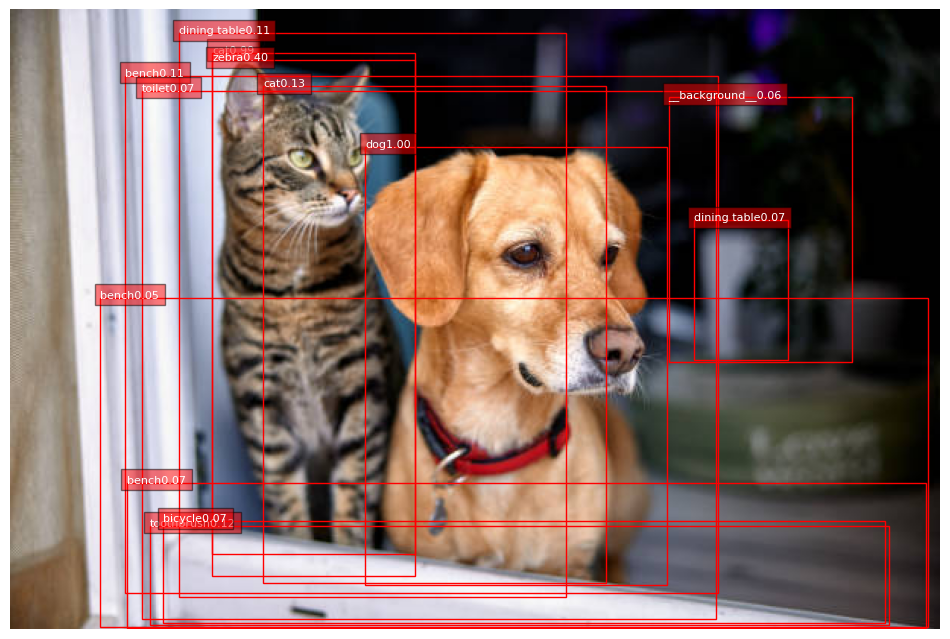

In [50]:
COCO_INSTANCE_LABEL_NAMES = [
    '','__background__','person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
img = test_img_tensor.squeeze().detach().cpu().numpy()
img = img.transpose(1,2,0)
CONFIDENCE_THRESHOLD =0.8
fig,ax = plt.subplots(1,figsize=[12,9])

ax.imshow(img)
for box ,label ,score in zip(preds[0]['boxes'],preds[0]['labels'],preds[0]['scores']):
  x1,y1,x2,y2 = box.detach().cpu().numpy()
  label_name = COCO_INSTANCE_LABEL_NAMES[label.item()]
  rect= patches.Rectangle([x1,y1],x2-x1,y2-y1,linewidth=1, edgecolor='r',facecolor='none')
  ax.add_patch(rect)
  plt.text(x1, y1, f'{label_name}{score.item():.2f}' ,color = 'white',fontsize = 8 , bbox = dict (facecolor = 'red', alpha =0.5))


plt.axis('off')
plt.show()